# Lab assignment 1: Image recognition using deep networks

Ignasi Oliveres, Ourania Koutsoukou, Oriol Pomarol, Emmanouil Iliakis



## Exercise one: Identifying handwritten numbers

### Question 1 (3 points)
*Discuss with your group, then describe to your teacher, a list of applications where automatic recognition of hand-written numbers would be useful.*


*   Processing of physical surveys where the answer is a number

*   Scanning prices of items in a market

*   Digitalizing phone numbers from a telephone book

**OTHERS**!!

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

First, download MNIST and store both train and test tuples.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


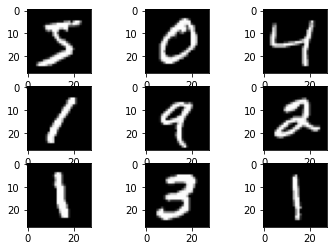

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

**Data preparation**

Use the function numpy.reshape to convert the flatten training and test set images from 28x28 pixels to a column of 784 pixels for each image (row). Save the results as new variables called x_train and x_test to avoid overwriting the original images. These should have dimensions 60000x784 and 10000x784 respectively (use the call .shape on the variables to check this).

In [ ]:
x_train=np.reshape(x_train,(60000,784))
x_test=np.reshape(x_test,(10000,784))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


Now rescale x_train and x_test to values between zero and one by dividing each
variable by 255.

In [ ]:
x_train=x_train/255
x_test=x_test/255

Use the function keras.utils.to_categorical(var, 10) to convert the train and
testset labels to two new variables, called y_train and y_test.

In [ ]:
y_train= keras.utils.to_categorical(y_train, 10)
y_test= keras.utils.to_categorical(y_test, 10)

**Model definition**

To make the MLP model, enter the following code.


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

To check the resulting model is what you expect, use:

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Compile the model with suitable loss functions, optimisation
procedures, and performance measures, as follows:

In [ ]:
model.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

**Training and evaluation**

### Question 2 (5 points)
*Show your teacher the text from your console, with how long it took for each epoch to run and the training performance history.*

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, 
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 5s 5ms/step - loss: 0.3955 - accuracy: 0.8867 - val_loss: 0.2958 - val_accuracy: 0.9150
Epoch 2/12
375/375 [==============================] - 2s 5ms/step - loss: 0.3089 - accuracy: 0.9128 - val_loss: 0.2749 - val_accuracy: 0.9257
Epoch 3/12
375/375 [==============================] - 2s 4ms/step - loss: 0.2937 - accuracy: 0.9182 - val_loss: 0.2909 - val_accuracy: 0.9208
Epoch 4/12
375/375 [==============================] - 2s 4ms/step - loss: 0.2870 - accuracy: 0.9202 - val_loss: 0.2793 - val_accuracy: 0.9247
Epoch 5/12
375/375 [==============================] - 2s 4ms/step - loss: 0.2811 - accuracy: 0.9215 - val_loss: 0.2827 - val_accuracy: 0.9231
Epoch 6/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2783 - accuracy: 0.9212 - val_loss: 0.2728 - val_accuracy: 0.9237
Epoch 7/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2738 - accuracy: 0.9245 - val_loss: 0.2822 - val_accuracy: 0.9253
Epoch 

### Question 3 (3 points)
*Plot the training history and show this to your teacher.*

In [ ]:
print(history.history.keys())
['accuracy', 'loss', 'val_accuracy', 'val_loss']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


['accuracy', 'loss', 'val_accuracy', 'val_loss']

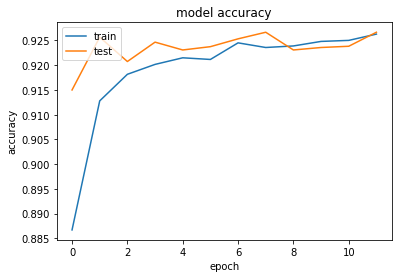

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

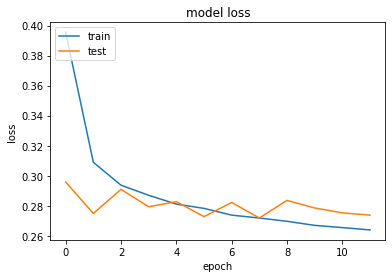

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 4 (5 points)
*Discuss with your group, then describe to your teacher, how the accuracy on the training and validation sets progress differently across epochs, and what this tells us about the generalisation of the model.*

In the first plot from the previous exercise, the accuraccy converges at 92% in the 5th epoch and after that there are slight fluctuations around this number. Therefore, the model does not overfit as the accuracy for both sets tends to the same value. This also indicates that the model will have a good generalization.

However, the model loss in the validation does not dicrease as much as the training set. Even though this might indicate a slight overfit, this happened only in this case and the other members of the group got non-overfitign results. Consequently, we attribute this behaviour to the randomness in the algorithm training.

### Question 5 (2 points)
*Show your teacher what values you get for the model’s accuracy and loss.*

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
loss, accuracy

(0.2771688401699066, 0.925000011920929)

### Question 6 (5 points)
*Discuss with your group, then describe to your teacher, whether this accuracy is sufficient for some uses of automatic hand-written digit classification.*




The accuracy is quite good (above 0.9) but the algorithm still missclassifies too much for certain delicate applications. 

It would suffice if the outcome of having an error in one number is not catastrophic, for example as an automated way to find the postal code for post purposes. If mistakes occur, the problem that arises is not that important as it can be fixed by manual assessment. However, using this algorith for reading cheque numbers could potentially be problematic. A wrong amount of money can be accidentally deposited or even the bank number could be changed and the correction this kind of mistakes is more complex.

### Question 7 (5 points)
*Discuss with your group, then describe to your teacher, how linear activation of units limits the possible computations this model can perform.*

Having a non-linear activation function allows the model to learn more complex functions than a network trained using a linear activation function. A combination of linear functions will still output a linear function independently of the number of layers of the model. This is likely to provide biased results when the true vlues follow non-linear functions. On the other hand, non-linear activation functions allow the model to adapt to more diverse behaviours.

**Changing model parameters**

Now make a similar model with a rectified activation in the first hidden layer, by adding the extra argument:
`activation = “relu”`
to the model definition for this layer. Then compile, fit and evaluate the model.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,),activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')
history = model.fit(x_train, y_train, batch_size=128, 
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 3s 6ms/step - loss: 0.3166 - accuracy: 0.9110 - val_loss: 0.1766 - val_accuracy: 0.9517
Epoch 2/12
375/375 [==============================] - 2s 5ms/step - loss: 0.1421 - accuracy: 0.9593 - val_loss: 0.1314 - val_accuracy: 0.9631
Epoch 3/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0973 - accuracy: 0.9723 - val_loss: 0.0997 - val_accuracy: 0.9713
Epoch 4/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0720 - accuracy: 0.9789 - val_loss: 0.0916 - val_accuracy: 0.9731
Epoch 5/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0558 - accuracy: 0.9838 - val_loss: 0.0902 - val_accuracy: 0.9737
Epoch 6/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0452 - accuracy: 0.9868 - val_loss: 0.0867 - val_accuracy: 0.9748
Epoch 7/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0901 - val_accuracy: 0.9737
Epoch 

### Question 8 (2 points)
*Plot the training history and show it to your teacher.*

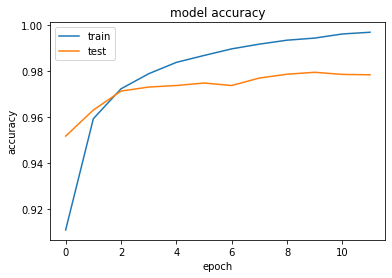

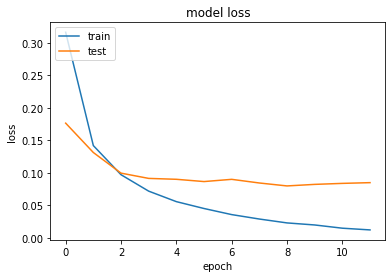

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 9 (5 points)
*Discuss with your group, then describe to your teacher, how this training history differs from the previous model, for the training and validation sets. Describe what this tells us about the generalisation of the model.*

The training test accuracy improves much faster and reaches higher levels of accuracy. On the other hand, a difference in training and validation set appears after epoch 2, reaching 0.02 for the accuracy and around 0.10 for the loss, which is quite significant. This seems to point that the model is overfitting and is thus less generalizable.


**Deep convolutional networks**

Reshape x_train to size 60000, 28, 28, 1. Reshape x_test to size 10000, 28, 28, 1. Rescale both results to values between zero and one as before.

### Question 10 (2 points)
*Plot the training history and show this to your teacher.*




In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train=np.reshape(x_train,(60000,28,28,1))
x_test=np.reshape(x_test,(10000,28,28,1))
x_train=x_train/255
x_test=x_test/255
y_train= keras.utils.to_categorical(y_train, 10)
y_test= keras.utils.to_categorical(y_test, 10)

Model

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape=(28, 28,1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1), 
metrics='accuracy') 

Training the model

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, 
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 15s 18ms/step - loss: 0.2278 - accuracy: 0.9306 - val_loss: 0.0809 - val_accuracy: 0.9758
Epoch 2/6
375/375 [==============================] - 6s 17ms/step - loss: 0.0537 - accuracy: 0.9834 - val_loss: 0.0545 - val_accuracy: 0.9837
Epoch 3/6
375/375 [==============================] - 7s 18ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0448 - val_accuracy: 0.9868
Epoch 4/6
375/375 [==============================] - 6s 17ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0437 - val_accuracy: 0.9868
Epoch 5/6
375/375 [==============================] - 6s 17ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0477 - val_accuracy: 0.9877
Epoch 6/6
375/375 [==============================] - 6s 17ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0448 - val_accuracy: 0.9883


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

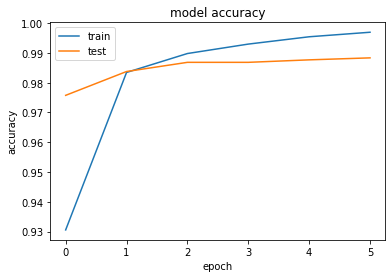

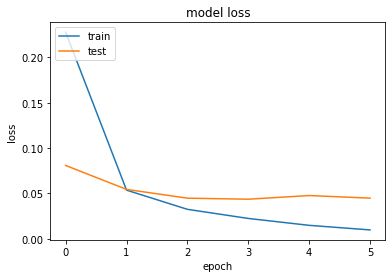

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 11 (5 points)
*Discuss with your group, then describe to your teacher, how the training history differs from the previous model, for the training and validation sets. What does this tell us about the generalisation of the model?*



We can see that there is a deviance in the validation and training set both in the accuracy and in the model loss. Even though, this difference is not that significant in the model accuracy (about 0.01) still it exists, which indicates overfitting of the model, thus it cannot be generalised. On top of that, the difference in the model loss is staggering as it is about 0.04 which a clear indication of overfitting on the training set.
Description of the accuracy

### Question 12 (5 points)
*Show your teacher what values you get for the model’s accuracy and loss.*

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
loss, accuracy

(0.030627718195319176, 0.9908000230789185)

### Question 13 (5 points)
*Discuss with your group, then describe to your teacher, whether this accuracy is 
sufficient for some uses of automatic hand-written digit classification.*

Even though, the accuracy of both training and validation set is significantly increased from 0.92(flatten model) to 0.99 which is good for applications such as postal codes, processing of physical surveys or scanning prices but it wouldn't be trusted for money transactions as the number of digits could be plenty which basically decreases the probability of having them all correct guessed and the consequencies of a mistake are severe.

### Question 14 (3 points)
*Add dropout layers (model.add(keras.layers.Dropout(rate=x))) after the 
max pooling stage (x = 0.25) and after the fully-connected (dense) layer (x = 0.5). 
Compile and train the resulting model as before. 
Discuss with your group, then describe to your teacher, how the training history 
differs from the previous (convolutional) model, for both the training and validation 
sets, and for the time taken to run each model epoch.*


### *Answer*!!!!!!!!!

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape=(28, 28,1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1), 
metrics='accuracy') 

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, 
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 8s 18ms/step - loss: 0.3116 - accuracy: 0.9038 - val_loss: 0.0798 - val_accuracy: 0.9771
Epoch 2/6
375/375 [==============================] - 7s 17ms/step - loss: 0.1048 - accuracy: 0.9689 - val_loss: 0.0576 - val_accuracy: 0.9829
Epoch 3/6
375/375 [==============================] - 7s 17ms/step - loss: 0.0784 - accuracy: 0.9769 - val_loss: 0.0480 - val_accuracy: 0.9864
Epoch 4/6
375/375 [==============================] - 6s 17ms/step - loss: 0.0610 - accuracy: 0.9823 - val_loss: 0.0453 - val_accuracy: 0.9881
Epoch 5/6
375/375 [==============================] - 7s 18ms/step - loss: 0.0542 - accuracy: 0.9831 - val_loss: 0.0486 - val_accuracy: 0.9866
Epoch 6/6
375/375 [==============================] - 7s 17ms/step - loss: 0.0470 - accuracy: 0.9859 - val_loss: 0.0399 - val_accuracy: 0.9897


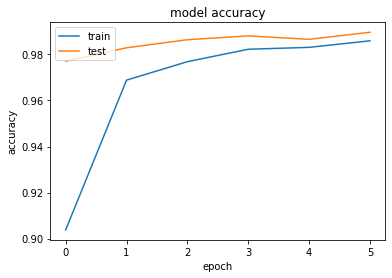

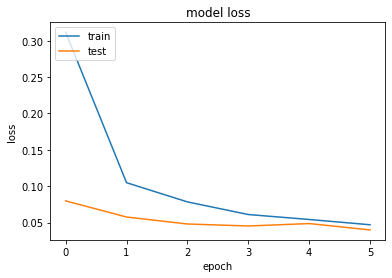

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 15 (3 points)
*Discuss with your group, then describe to your teacher, what this tells us about the 
generalisation of the two models.*

Even though, the accuracy and model loss are worse than the previous model in general, this model is more generalisable as the validation loss is lower than the one in the training set and the accuracy in the validation set is higher than the one in the training set. 

### Question 16 (6 points)
*Before fitting the model, show your teacher the code you used to define the model described here.*

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
y_train= keras.utils.to_categorical(y_train, 10)
y_test= keras.utils.to_categorical(y_test, 10)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(32, 32, 3), padding = "same"))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", padding = "same"))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate=0.0001,
decay=1e-6),metrics='accuracy')

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, 
epochs=20, verbose=1, validation_data=(x_test, y_test),shuffle = True)

Epoch 1/20
1563/1563 [==============================] - 23s 14ms/step - loss: 1.8755 - accuracy: 0.3070 - val_loss: 1.6074 - val_accuracy: 0.4152
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5890 - accuracy: 0.4153 - val_loss: 1.4626 - val_accuracy: 0.4674
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4585 - accuracy: 0.4727 - val_loss: 1.4432 - val_accuracy: 0.4955
Epoch 4/20
1563/1563 [==============================] - 23s 14ms/step - loss: 1.3694 - accuracy: 0.5095 - val_loss: 1.3100 - val_accuracy: 0.5354
Epoch 5/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3022 - accuracy: 0.5368 - val_loss: 1.1985 - val_accuracy: 0.5777
Epoch 6/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2436 - accuracy: 0.5589 - val_loss: 1.1452 - val_accuracy: 0.5984
Epoch 7/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1917 - accuracy: 0.5782 - val_loss: 1.0936 -

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        9248      
                                                      

### Question 17
*Plot the training history and show it to your teacher*


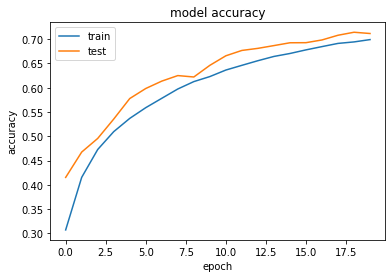

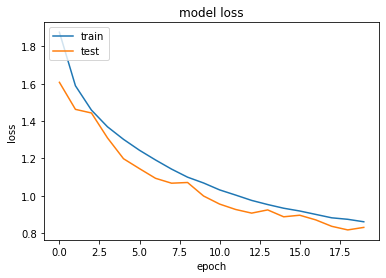

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
loss, accuracy

(0.830750584602356, 0.7117000222206116)

### Question 18
*Discuss with your group, then describe to your teacher, how the training history
differs from the convolutional model for digit recognition and why.*

- The accuracy doesn't reach a plateau
- Learning rate is lower, thus the accuracy is lower
- The task here is more complex than digit recognition(why)

number of the accuracy (0.70)

### Question 19
*Discuss with your group, then describe to your teacher, how the time taken for each
training epoch differs from the convolutional model for digit recognition. Give several
factors that may contribute to this difference.*

- Almost double time
- Twice as mayn convolutional layers (extra explanation)
- Bigger images in dimensions (32x32)
- Colored images (3 times bigger than a grayscale)
- The dense layers have 512 neurons instead of 128 neurons
- Even though the batch size is lower (32 vs 128) the model complexity plays a more significant role
- Even though the filters in the second convolutional layer are reduced to 32 (instead of 64), is still not enough to equalize the training time in those models


### Question 20 (5 points)
*Write a simple function that achieves the convolution operation efficiently for twodimensional and three-dimensional inputs. This should allow you to input a set of
convolutional filters (‘kernels’ in Keras’s terminology) and an input layer (or image)
as inputs. The input layer should have a third dimension, representing a stack of
feature maps, and each filter should have a third dimension of corresponding size.
The function should output a number of two-dimensional feature maps
corresponding to the number of input filters, though these can be stacked into a third
dimensional like the input layer. After agreeing on a common function with your
group members, show this to your teacher*

In [ ]:
output_matrix_list = []
input_matrix=inpt
filter_matrix=filter1
#k=l always
#for l in range(input_matrix.shape[0]):
    output_layer=[]
    for k in range(0,len(filter_matrix)):
        l=k
        output_list = []
        for i in range(0,input_matrix.shape[1]-filter_matrix[k].shape[0]+1):
            for j in range(0,input_matrix.shape[2]-filter_matrix[k].shape[1]+1):
                output_list.append(np.multiply(input_matrix[l][i:filter_matrix[k].shape[1]+i, j:filter_matrix[k].shape[1]+j], filter_matrix[k]).sum())
        output_matrix_list.append(np.matrix(np.array_split(output_list, input_matrix.shape[2]-filter_matrix[k].shape[0]+1)))
    output_layer.append(output_matrix_list)

In [ ]:
def convolutional_operation(input_matrix, filter_matrix):
    output_matrix_list = []
    for k in range(0,len(filter_matrix)):
        output_list = []
        for i in range(0,input_matrix.shape[0]-filter_matrix[k].shape[0]+1):
            for j in range(0,input_matrix.shape[1]-filter_matrix[k].shape[1]+1):
                output_list.append(np.multiply(input_matrix[i:filter_matrix[k].shape[0]+i, j:filter_matrix[k].shape[1]+j], filter_matrix[k]).sum())
        output_matrix_list.append(np.matrix(np.array_split(output_list, input_matrix.shape[1]-filter_matrix[k].shape[1]+1)))
    return output_matrix_list

In [ ]:
convolutional_operation(inpt, filter1)

### Question 21 (2 Points)
*Write a simple function that achieves rectified linear (relu) activation over a whole 
feature map, with a threshold at zero. After agreeing on a common function with your 
group members, show this to your teacher.*

In [ ]:
def relu_activation(inpt):
  output=inpt.copy()
  output[output<0]=0
  return output  

In [ ]:
inpt=np.matrix([[-1,2,3],[4,-5,6],[7,8,-9]])
print(inpt)
relu_activation(inpt)bbb

[[-1  2  3]
 [ 4 -5  6]
 [ 7  8 -9]]


matrix([[0, 2, 3],
        [4, 0, 6],
        [7, 8, 0]])

In [1]:
import numpy as np
np.random.normal()

In [9]:
activation=np.array([0.25,0.5,0.75,1,0.3,0.7])
softmax_out=activation/sum(np.exp(activation))

In [11]:
def softmax(input_layer):
    return input_layer/sum(np.exp(input_layer))


In [12]:
softmax(activation)

array([0.02245851, 0.04491701, 0.06737552, 0.08983402, 0.02695021,
       0.06288382])